# King County Housing Analysis Using Linear Regression

* Student name: Brian O'Donnell
* Student pace: Flex self paced
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:
        

## Overview
My assigned task was to analyze the King County Housing dataset using linear regression models in order to make profitable business decisions for a new real estate development company. The idea of the modeling is to find out what features of a house lead to the highest selling prices. The criteria listed in the dataset that I initially want to look at include: Number of Bedrooms, Number of Bathrooms, Number of Floors, Condition of the house and Square Footage, Grade and Year Built. As we progress with the models we will add or remove features as needed. 

## Business Problem
The housing market has always been competitive, but it can be argued that is more true now than ever. The issue that our clients want us to help them address is with identifying features that give a house the best chance to be highly valued.
Once a developer has this information it can be used to increase profit margins through understanding what features to spend money on for the greatest return. If the developer is in the market of single family new builds then knowing what is the optimal number of floors, bedrooms and bathrooms will help reducing chance of overspending. Furthermore if the business wants to renovate and they know what condition a house has to be in to turn the best profit, they will have a leg up on the competitors. 

### Hypothesis 
Simply put our Null Hypothesis is that the features listed in the data set do not have a influential relationship with the price of the home. While our Alternative Hypothesis is that there is a relationship with the price of the house and the features. 

***

### Data Understanding

To begin this process we first will import our data and inspect it. We must make sure there are no missing values or other issues that will keep us from being able to run our regression models. The data we are using was supplied in the github repository and includes all data of single-family home sales from 2014-2015 in King County numbered at over 21,000.

***

In [91]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Data Preparation 

In [2]:
# Accessing the dataset and loading the first 5 rows for reference.

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [3]:
# Taking a look at some of the numerical data of the dataframe.

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [4]:
# A view of some of the information in our data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Columns that are not numeric :
    #date-will likely be removed
    #waterfront
    #view
    #condition
    #grade
    #sqft_basement

In [6]:
# Year built dispersion

df.yr_built.describe()

count   21597.00
mean     1971.00
std        29.38
min      1900.00
25%      1951.00
50%      1975.00
75%      1997.00
max      2015.00
Name: yr_built, dtype: float64

In [7]:
# Info on square footage of living space

df['sqft_living'].describe()

count   21597.00
mean     2080.32
std       918.11
min       370.00
25%      1430.00
50%      1910.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64

In [8]:
# Number of houses that fall under each level of condition

df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [9]:
# Stats for floor counts

df['floors'].value_counts()

1.00    10673
2.00     8235
1.50     1910
3.00      611
2.50      161
3.50        7
Name: floors, dtype: int64

In [10]:
# Upon first glance one might think this category has something to do with slope of the ground where the house is located,
# but after looking at the King County website we see that it represents the construction quality of the building,
# where 1 is the lowest and 13 the highest which is considered "Mansion Level". 

df.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

****
We've taken a look at some tables for the columns to see what the data looks like, and now Im going to create some charts just for another way to view the data and see how its distributed.


***

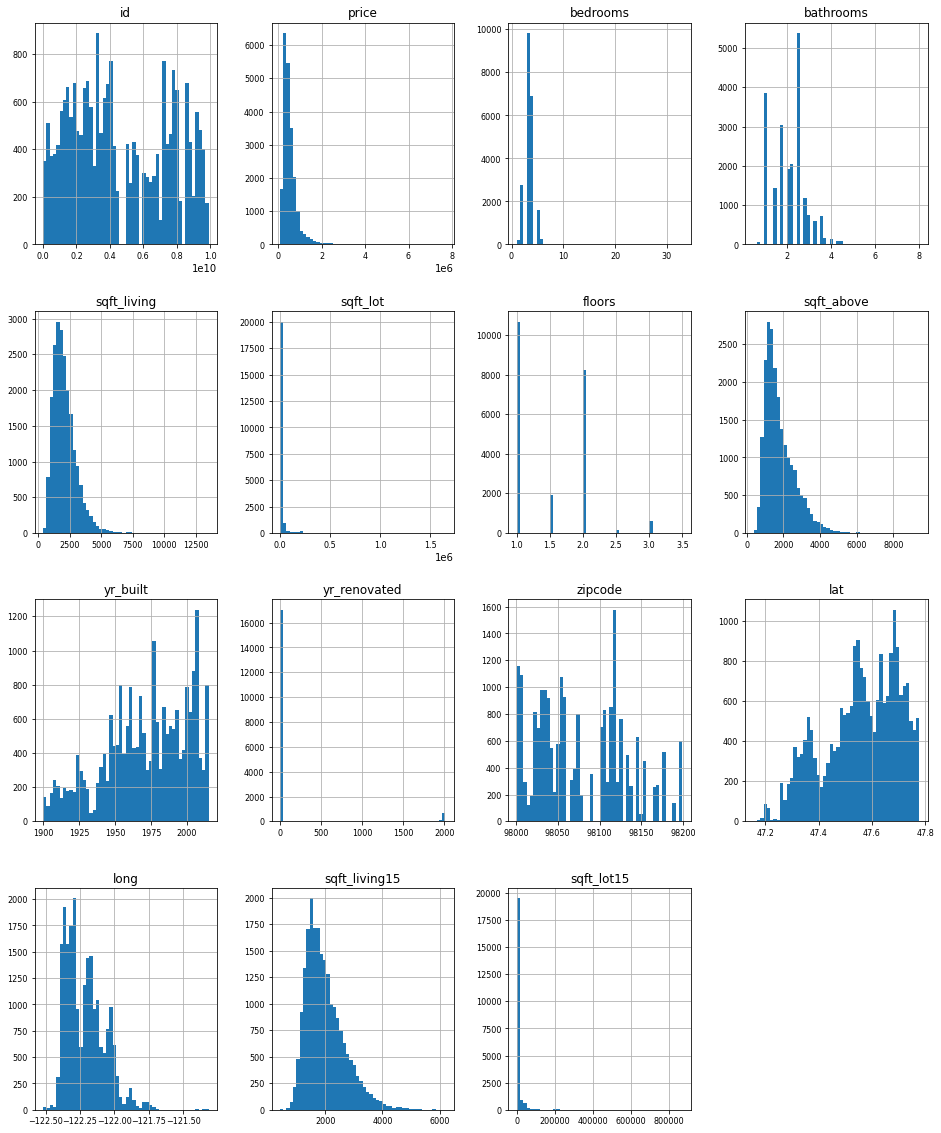

In [11]:
# Visualizations to see how the data of each column is distributed:
df[df.select_dtypes(exclude = object).columns].hist(figsize=(16, 20),
                                                        bins = 50, xlabelsize = 8, ylabelsize = 8);


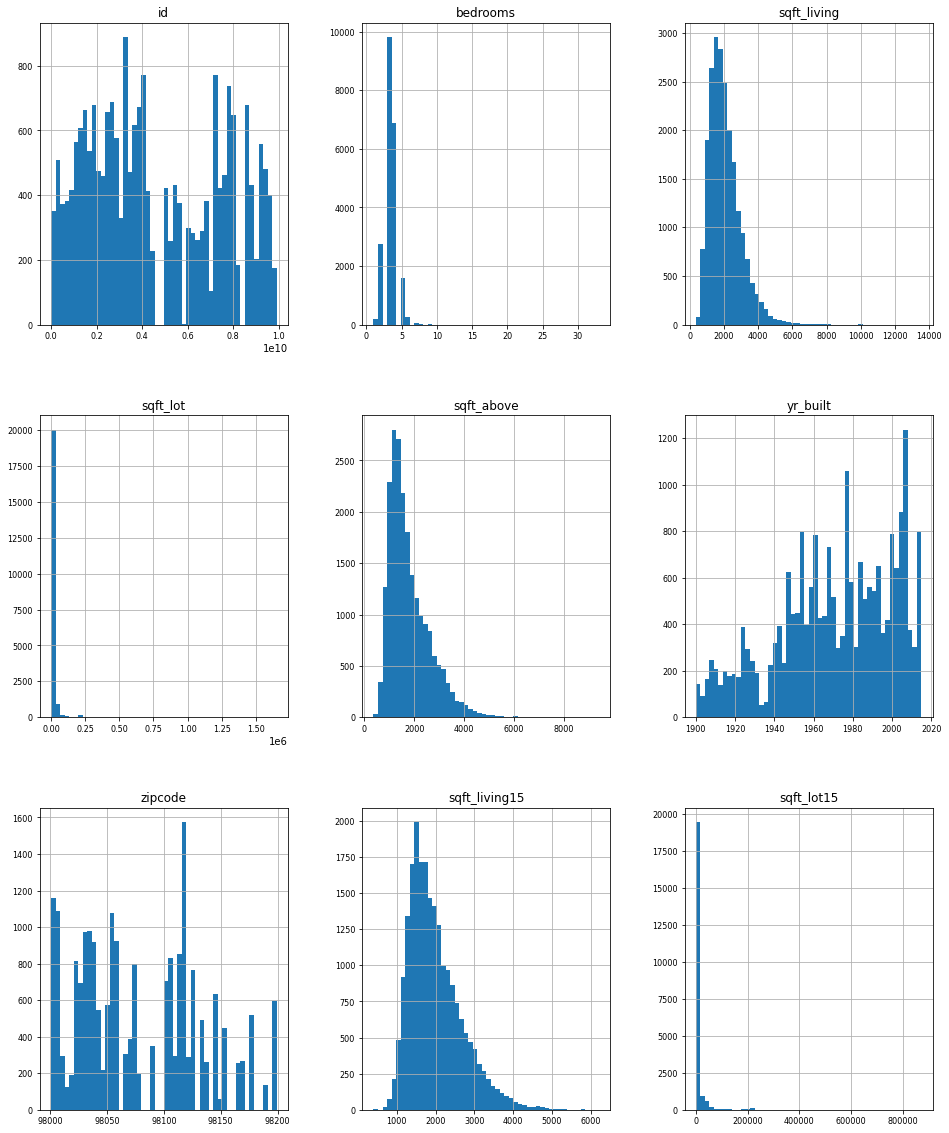

In [12]:
df[df.select_dtypes(exclude = float).columns].hist(figsize=(16, 20),
                                                        bins = 50, xlabelsize = 8, ylabelsize = 8);


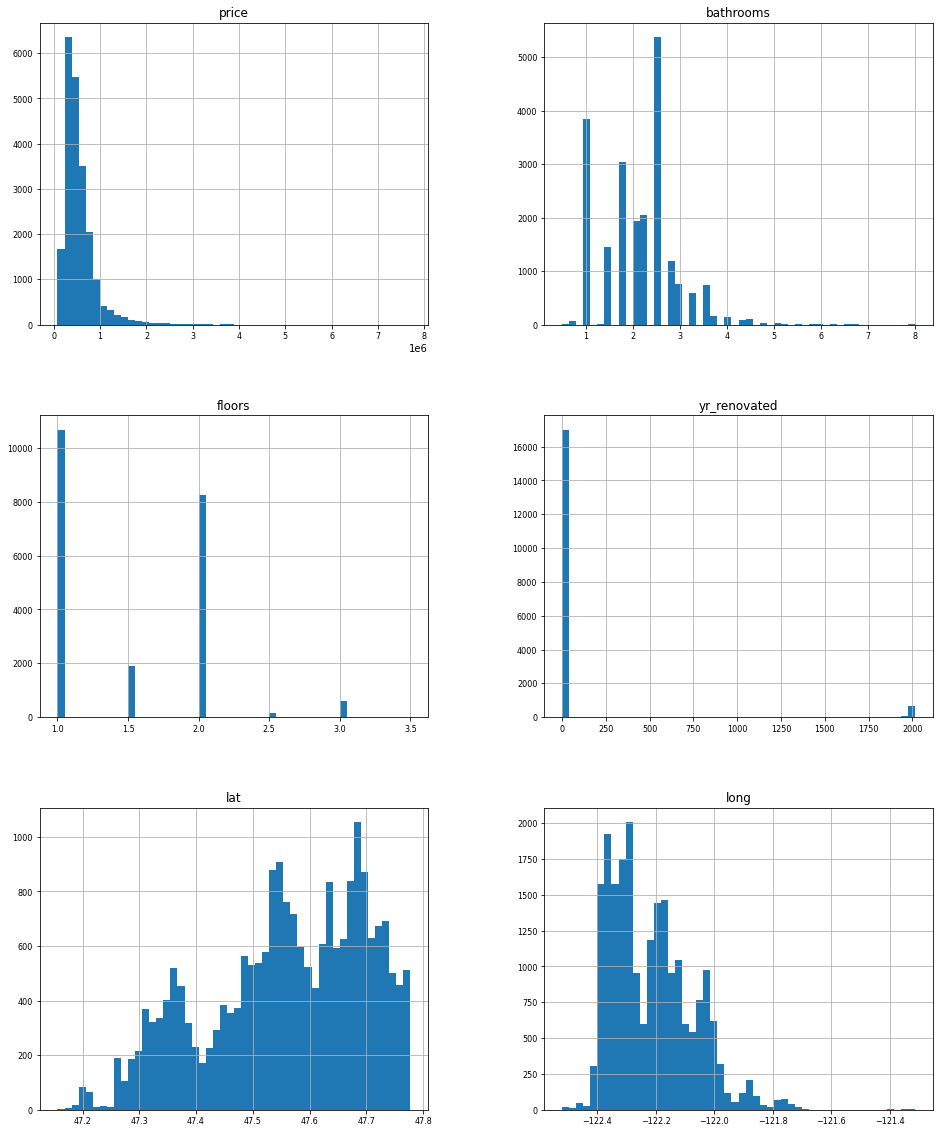

In [13]:
df[df.select_dtypes(exclude = int).columns].hist(figsize=(16, 20),
                                                        bins = 50, xlabelsize = 8, ylabelsize = 8);


### Initial Cleaning

From here we will look at the columns individually and see see what needs to be done. This will include doing tasks such as removing null values and outliers, converting string data into integers and anything else that is needed in order to run our models. 

#### Basement Square Footage

In [14]:
# Its odd that this column is an object and not numerical, so Im using this function to take a look at the values
#to see if we can learn anything.

df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [15]:
#So there was a "?" inputted, we will remove that so we can turn this column into a float.

df = df[df.sqft_basement != '?']
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [16]:
# Check to make sure the changes are reflected in the basement column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

#### Waterfront

In [17]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [18]:
df.waterfront.value_counts()

NO     18662
YES      142
Name: waterfront, dtype: int64

In [19]:
df['waterfront'].isna().sum()

2339

In [20]:
# The overwhelming majority of properties are NOT listed as waterfront, therefore I feel
# comfortable filling the Nan values as also not being waterfront.
#After that I will convert the YES/NO's into 1/0's to make the column numeric.

df['waterfront'].fillna(df['waterfront'].mode().values[0], inplace = True)


In [21]:
df['waterfront'] = df['waterfront'].map({'YES': 1, 'NO': 0})

In [22]:
# Checking for success...
df.waterfront

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: waterfront, Length: 21143, dtype: int64

In [23]:
df.waterfront.isna().sum()

0

***

### View

In [24]:
df.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [25]:
df['view'].value_counts()

NONE         19018
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [26]:
df['view'].isna().sum()

61

Over 90% of the properties have no view listed, on top of that there are missing values and the column is listed as an object as opposed to an integer. Instead of bothering cleaning this up it will just be dropped. I believe there are not enough properties with a view to work with in our models.

****

#### Year Renovated

In [27]:
df['yr_renovated'].isna().sum()

3754

In [28]:
df['yr_renovated'].shape

(21143,)

In [29]:
df['yr_renovated'].value_counts()

0.00       16666
2014.00       69
2003.00       31
2013.00       31
2007.00       30
           ...  
1953.00        1
1944.00        1
1934.00        1
1971.00        1
1959.00        1
Name: yr_renovated, Length: 69, dtype: int64



 So when looking at this category we see:
  - Of the 21,143 values there are 3,754 missing = 17%
  - Of the 21,143 values there are 16,666 houses with no renovation = 79%

I'm making an assumption that the null values are most likely homes that were never renovated since 79% of the houses are confirmed to be not. Therefore instead of dropping the 3,754 null values I will just change them into not being renovated so we do not have to remove those sales from the data set. 




In [30]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'].isna().sum()

0

***

#### Bedrooms

In [31]:
df['bedrooms'].value_counts()

3     9639
4     6740
2     2691
5     1560
6      262
1      191
7       36
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [32]:
# After a quick look we see that the most common number of bedrooms goes in the order of 3,4,2,5. Which seems
# perfectly logical. However while 10 and 11 bedrooms in a house could be possible, having 33 seems completely
# unlikely, if I had to take a guess this value was fat-fingered in. Therefore I will remove it to avoid ouliers.

df = df[(df.bedrooms != 33)]

****

In [33]:
# Taking a look at our dataset which should be close to fully cleaned now.
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             61
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21142 non-null  int64  
 1   date           21142 non-null  object 
 2   price          21142 non-null  float64
 3   bedrooms       21142 non-null  int64  
 4   bathrooms      21142 non-null  float64
 5   sqft_living    21142 non-null  int64  
 6   sqft_lot       21142 non-null  int64  
 7   floors         21142 non-null  float64
 8   waterfront     21142 non-null  int64  
 9   view           21081 non-null  object 
 10  condition      21142 non-null  object 
 11  grade          21142 non-null  object 
 12  sqft_above     21142 non-null  int64  
 13  sqft_basement  21142 non-null  float64
 14  yr_built       21142 non-null  int64  
 15  yr_renovated   21142 non-null  float64
 16  zipcode        21142 non-null  int64  
 17  lat            21142 non-null  float64
 18  long  

In [35]:
print(df.shape)


(21142, 21)


#### Final Cleaning Steps
The only column with null values is 'view' which we decided to drop since it was so small. And the last columns that are objects are condition, grade, view, and date. The date column can also be dropped. In addition, the id column serves no purpose, the longitude and latitude values are not necessary, and the square footage of the nearest 15 neighbors is not relevant. Therefore these will be dropped as well.

In [36]:
# Dropping last columns and creating final cleaned dataframe:
df = df.drop(columns = [ 'id', 'date', 'view', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode'])

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.00,3,1.00,1180,5650,1.00,0,Average,7 Average,1180,0.00,1955,0.00
1,538000.00,3,2.25,2570,7242,2.00,0,Average,7 Average,2170,400.00,1951,1991.00
2,180000.00,2,1.00,770,10000,1.00,0,Average,6 Low Average,770,0.00,1933,0.00
3,604000.00,4,3.00,1960,5000,1.00,0,Very Good,7 Average,1050,910.00,1965,0.00
4,510000.00,3,2.00,1680,8080,1.00,0,Average,8 Good,1680,0.00,1987,0.00


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21142 non-null  float64
 1   bedrooms       21142 non-null  int64  
 2   bathrooms      21142 non-null  float64
 3   sqft_living    21142 non-null  int64  
 4   sqft_lot       21142 non-null  int64  
 5   floors         21142 non-null  float64
 6   waterfront     21142 non-null  int64  
 7   condition      21142 non-null  object 
 8   grade          21142 non-null  object 
 9   sqft_above     21142 non-null  int64  
 10  sqft_basement  21142 non-null  float64
 11  yr_built       21142 non-null  int64  
 12  yr_renovated   21142 non-null  float64
dtypes: float64(5), int64(6), object(2)
memory usage: 2.3+ MB


The dataframe is almost where we need it to be, some categorical columns now needs to be altered so that it contains strictly numeric values so it can be used in the models. This will be done using a function that creates a new dataframe for that particular column and replaces the values into binary form. We will start with the 'grade' column.

#### Grade

In [38]:
grade_dummies = pd.get_dummies(df['grade'], drop_first=True)
grade_dummies.head()


,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0


In [39]:
grade_dummies.nunique()

11 Excellent     2
12 Luxury        2
13 Mansion       2
3 Poor           2
4 Low            2
5 Fair           2
6 Low Average    2
7 Average        2
8 Good           2
9 Better         2
dtype: int64

#### Condition

In [40]:
df.condition.value_counts()

Average      13726
Good          5557
Very Good     1665
Fair           166
Poor            28
Name: condition, dtype: int64

In [41]:
df.condition.isna().sum()

0

In [42]:
condition_dummies = pd.get_dummies(df['condition'], prefix = 'cond', drop_first = True)


In [43]:
condition_dummies.head()

,cond_Fair,cond_Good,cond_Poor,cond_Very Good
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0


In [44]:
condition_dummies.nunique()

cond_Fair         2
cond_Good         2
cond_Poor         2
cond_Very Good    2
dtype: int64

****

We have gone through each column and prepared the data for modeling. Now we must create a new dataframe by combining the original data set with the binary ones. 

****

In [45]:
# Creating a new clean dataframe.

df_clean = pd.concat([df.drop(['grade', 'condition'], axis =1), grade_dummies, condition_dummies], axis =1 )
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better,cond_Fair,cond_Good,cond_Poor,cond_Very Good
0,221900.00,3,1.00,1180,5650,1.00,0,1180,0.00,1955,...,0,0,0,1,0,0,0,0,0,0
1,538000.00,3,2.25,2570,7242,2.00,0,2170,400.00,1951,...,0,0,0,1,0,0,0,0,0,0
2,180000.00,2,1.00,770,10000,1.00,0,770,0.00,1933,...,0,0,1,0,0,0,0,0,0,0
3,604000.00,4,3.00,1960,5000,1.00,0,1050,910.00,1965,...,0,0,0,1,0,0,0,0,0,1
4,510000.00,3,2.00,1680,8080,1.00,0,1680,0.00,1987,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,0,1530,0.00,2009,...,0,0,0,0,1,0,0,0,0,0
21593,400000.00,4,2.50,2310,5813,2.00,0,2310,0.00,2014,...,0,0,0,0,1,0,0,0,0,0
21594,402101.00,2,0.75,1020,1350,2.00,0,1020,0.00,2009,...,0,0,0,1,0,0,0,0,0,0
21595,400000.00,3,2.50,1600,2388,2.00,0,1600,0.00,2004,...,0,0,0,0,1,0,0,0,0,0


****

Here is one last look at the new dataframe confirming everything is properly cleaned and ready for modeling.

From here is where we we will begin to find correlations between home features and a higher selling price.
Below I will display a few tables for reference and also visuals once again to get a better understanding of the data distribution


In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21142 non-null  float64
 1   bedrooms        21142 non-null  int64  
 2   bathrooms       21142 non-null  float64
 3   sqft_living     21142 non-null  int64  
 4   sqft_lot        21142 non-null  int64  
 5   floors          21142 non-null  float64
 6   waterfront      21142 non-null  int64  
 7   sqft_above      21142 non-null  int64  
 8   sqft_basement   21142 non-null  float64
 9   yr_built        21142 non-null  int64  
 10  yr_renovated    21142 non-null  float64
 11  11 Excellent    21142 non-null  uint8  
 12  12 Luxury       21142 non-null  uint8  
 13  13 Mansion      21142 non-null  uint8  
 14  3 Poor          21142 non-null  uint8  
 15  4 Low           21142 non-null  uint8  
 16  5 Fair          21142 non-null  uint8  
 17  6 Low Average   21142 non-null 

In [47]:
print(df.shape)
print(df_clean.shape)

(21142, 13)
(21142, 25)


In [48]:
df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better,cond_Fair,cond_Good,cond_Poor,cond_Very Good
count,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,...,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00,21142.00
mean,540506.02,3.37,2.12,2080.94,15087.57,1.49,0.01,1789.10,291.84,1971.02,...,0.00,0.01,0.09,0.42,0.28,0.12,0.01,0.26,0.00,0.08
std,368083.13,0.90,0.77,918.56,41210.13,0.54,0.08,828.41,442.50,29.32,...,0.04,0.10,0.29,0.49,0.45,0.33,0.09,0.44,0.04,0.27
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,370.00,0.00,1900.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,322000.00,3.00,1.75,1430.00,5043.00,1.00,0.00,1200.00,0.00,1952.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,450000.00,3.00,2.25,1910.00,7620.00,1.50,0.00,1560.00,0.00,1975.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,645000.00,4.00,2.50,2550.00,10695.75,2.00,0.00,2210.00,560.00,1997.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
max,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,9410.00,4820.00,2015.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


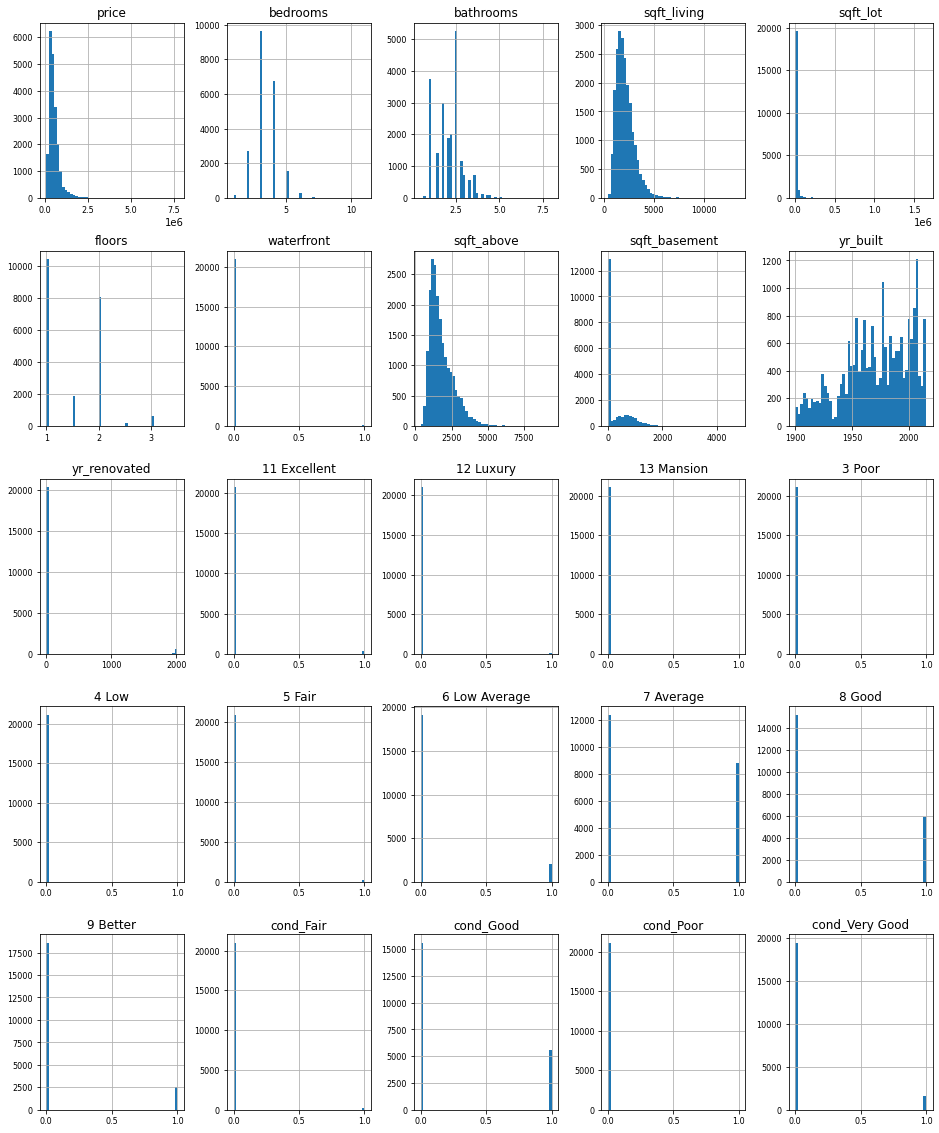

In [49]:
df_clean[df_clean.select_dtypes(exclude = object).columns].hist(figsize=(16, 20),
                                                        bins = 50, xlabelsize = 8, ylabelsize = 8);


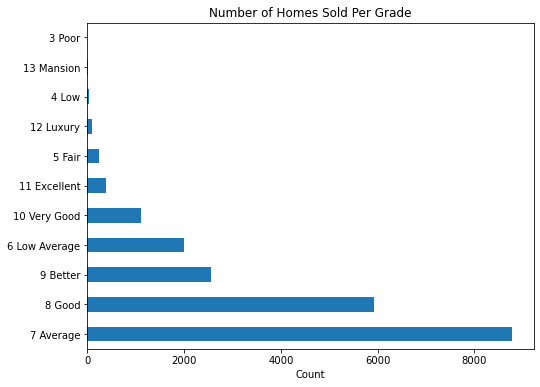

In [50]:
fig, ax = plt.subplots(figsize = (8,6))
df['grade'].value_counts().plot(kind='barh')
ax.set_title('Number of Homes Sold Per Grade')
ax.set_xlabel('Count');

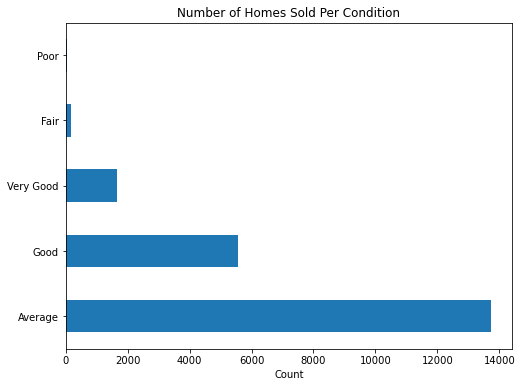

In [51]:
fig, ax = plt.subplots(figsize = (8,6))
df['condition'].value_counts().plot(kind='barh')
ax.set_title('Number of Homes Sold Per Condition')
ax.set_xlabel('Count');

****

### Initial Correlations 

A good first step is to create a heatmap and a table which will show us directly what features are most correlated with the homes price. This heatmap will be color coded where the lighter the color the higher the correlation, annotations will be added as well for easier understanding. Along with this map will be a table with the relations listed in order.

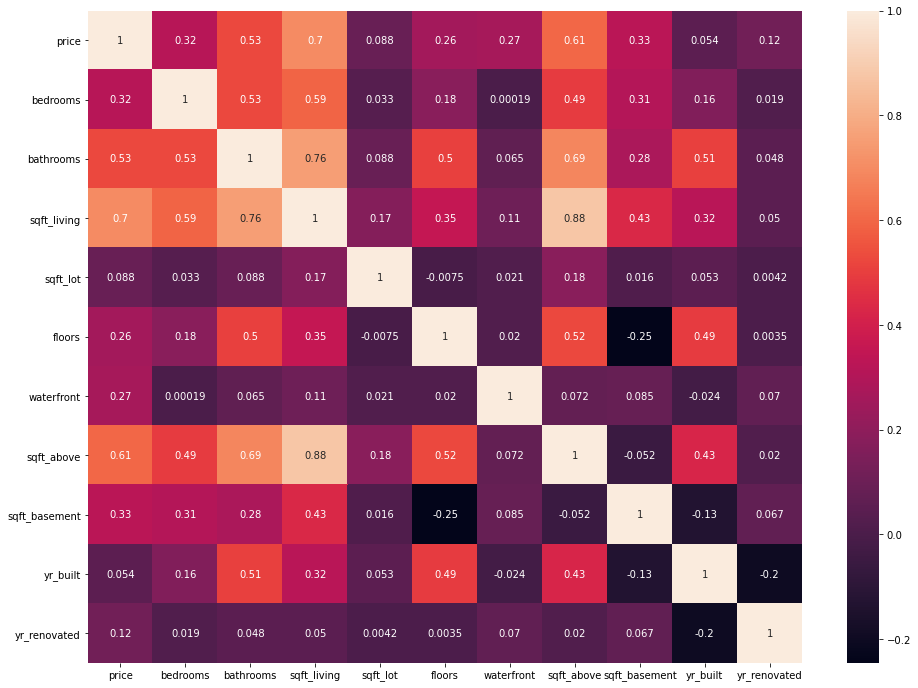

In [52]:
# Heatmap
corr_x = df.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr_x, annot=True );

In [53]:
# Here is a table which will be easier to read with our new data frame which has several 
# additional columns due to the 'grade' and 'condition' values being separated:

df_clean_corr=df_clean.corr()['price'].map(abs).sort_values(ascending = False)
df_clean_corr

price            1.00
sqft_living      0.70
sqft_above       0.61
bathrooms        0.53
11 Excellent     0.36
sqft_basement    0.33
bedrooms         0.32
7 Average        0.32
12 Luxury        0.29
waterfront       0.27
floors           0.26
9 Better         0.23
13 Mansion       0.21
6 Low Average    0.21
yr_renovated     0.12
sqft_lot         0.09
5 Fair           0.08
cond_Very Good   0.06
yr_built         0.05
cond_Fair        0.05
cond_Good        0.03
4 Low            0.03
cond_Poor        0.02
3 Poor           0.01
8 Good           0.01
Name: price, dtype: float64

Generally anything with a correlation above 0.7 is considered 'High' and anything between 0.5-0.7 is 'Moderate'.
The variables here that fall into 'High' are square footage living space and square footabe above basement. While bathrooms are considered a 'Moderate' correlated variable.

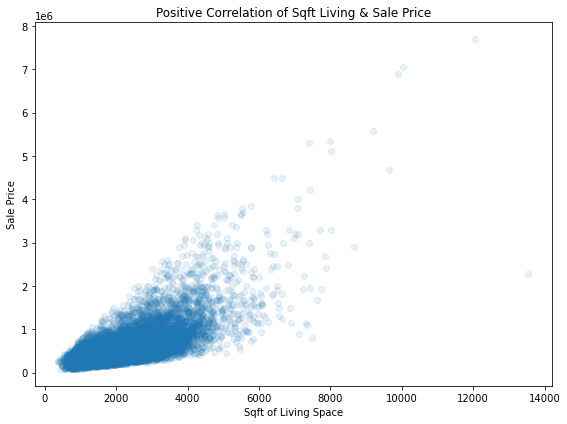

In [54]:
# Sqft_living had highest correlation
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(df_clean['sqft_living'], df_clean['price'], alpha = .1)
ax.set_xlabel('Sqft of Living Space')
ax.set_ylabel('Sale Price')
ax.set_title('Positive Correlation of Sqft Living & Sale Price')
plt.tight_layout()

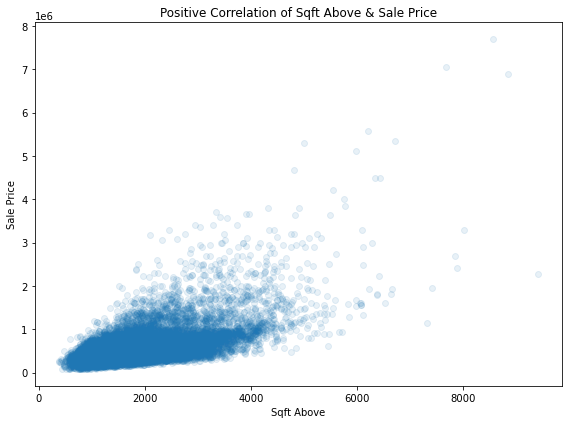

In [55]:
#Sqft_above had 2nd highest correlation
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(df_clean['sqft_above'], df_clean['price'], alpha = .1)
ax.set_xlabel('Sqft Above')
ax.set_ylabel('Sale Price')
ax.set_title('Positive Correlation of Sqft Above & Sale Price')
plt.tight_layout()

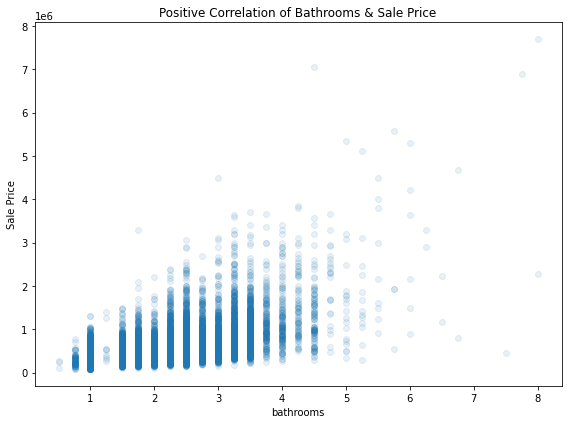

In [56]:
# Bathrooms had 3rd highest correlation
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(df_clean['bathrooms'], df_clean['price'], alpha = .1)
ax.set_xlabel('bathrooms')
ax.set_ylabel('Sale Price')
ax.set_title('Positive Correlation of Bathrooms & Sale Price')
plt.tight_layout()

In [57]:
# Split into X and y. 
# This separates our target variable, price, from the other variables
X = df_clean.drop('price', axis=1)
y = df_clean['price']
X.shape, y.shape

((21142, 24), (21142,))

### Multicollinearity

Now would be a good time to check for multicollinearity, which can adversely effect our model if it is not dealt with. We will check to see if there are multiple predictors that have a high correlation with each other that need to be removed.

In [58]:
#creating a new dataframe of using absolute values
pairs_df = df_clean.corr().abs().stack().reset_index().sort_values(0, ascending = False)
pairs_df['pairs']=list(zip(pairs_df.level_0, pairs_df.level_1))
pairs_df.set_index(['pairs'], inplace=True)
pairs_df.drop(columns=['level_1', 'level_0'], inplace = True)

#rename correlation column as cc rather than 0

pairs_df.columns = ['cc']

# drop duplicates

pairs_df.drop_duplicates(inplace = True)

# setting a range
pairs_df[(pairs_df.cc>.75) & (pairs_df.cc<1)]

pairs_df.head(3)

,cc
pairs,
"(price, price)",1.00
"(sqft_above, sqft_living)",0.88
"(sqft_living, bathrooms)",0.76


So after running that function we see some high correlations, we will remove 'sqft_living' since it is present in both items. 

In [59]:
df_clean.drop=df_clean.drop(columns = ['sqft_living'], inplace = True)

****

#### Modeling

Below is a function used to run an OLS  regression model. It will gives us an incredible amount of information from R-squared and Mean of Absolute Error values, as well as visuals that help us check that we are meeting our proper model assumptions.

In [60]:
def reg_qq_sced(y, X, add_constant=True, qq=True, sced=True):
    """
    Display a the summary output of a linear regression model, with predictors X and target y.

    Also displays a QQ plot and residual plot by default. These can be toggled off.
    
    The function will add a constant to the predictors by default, and this can be toggled off.
    """
    # Run a linear regression and display the summary
    if add_constant:
        X_sm = sm.add_constant(X, has_constant='add')
    else:
        X_sm = X
    model = sm.OLS(y, X_sm).fit()
    display(model.summary())

    # Display a QQ plot
    if qq:
        fig_qq = sm.graphics.qqplot(model.resid, line='45', fit=True,)
        fig_qq.suptitle('QQ plot for residual normality check')
    else:
        pass

    # Display a plot of predicted values vs. residuals
    if sced:    
        preds = model.predict(X_sm)
        residuals = model.resid
        fig_resid, ax = plt.subplots(figsize=(10,5))
        fig_resid.suptitle('Predicted vs. residual plot for homoscedasticity check')
        ax.scatter(preds, residuals, alpha=0.2)
        ax.plot(preds, [0 for i in range(len(X_sm))])
        ax.set_xlabel("Predicted Value")
        ax.set_ylabel("Actual - Predicted Value");
    else:
        pass
    lr = LinearRegression()
    lr.fit(X_sm, y)
    print(f'Model adjusted R-squared: {model.rsquared_adj}')
    print(f'Model Mean Absolute Error: {metrics.mean_absolute_error(y, lr.predict(X_sm))}')
    
    
# Code reference: https://github.com/zshoorbajee/King-County-House-Sales-Flatiron-Project2/
# blob/main/King_County_analysis.ipynb


#### Baseline Model

This will be our most simple model, starting with our highest correlated variable. This is the model that will be built off and used for comparisons.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.222e+04
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:44:08   Log-Likelihood:            -2.9613e+05
No. Observations:               21142   AIC:                         5.923e+05
Df Residuals:                   21140   BIC:                         5.923e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.943e+04   4796.537     12.391      0.000       5e+04    6.88e+04
sqft_above   268.8896      2.433    110.525      0.000     264.121     273.658
==============================================================================
Omnibus:                    16203.662   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           722719.582
Skew:                           3.280   Prob(JB):                         0.00
Kurtosis:                      30.882   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.36619704448254564
Model Mean Absolute Error: 192247.35195704998


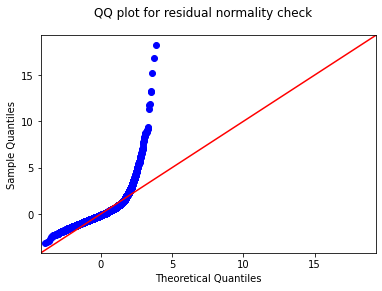

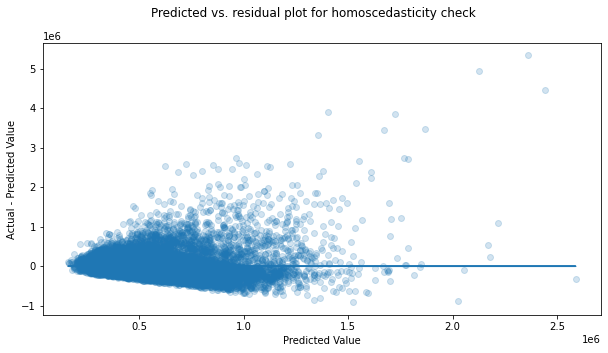

In [61]:
model = sm.OLS(y, X).fit()
reg_qq_sced(y, X['sqft_above'])

#### Initial Results
- The R-squared value of 36% would be not be considered strong in terms of explaining the variance of 'price' when it comes to 'sqft_above'. 
- The Mean of Absolute Errors is 192247.35. This number is the average of the absolute values of the individual prediction errors on over all instances in the set. We would like to see this number much lower. 
 - A general rule of thumb for skewness is that between -.5 and .5 means the data is symmetrical, while over 1 it is highly skewed. Meanwhile Kurtosis should be somewhere around 3.
    - Our skew is 3 and kurtosis is 30, this may have to be addressed in order 
     to have more accurate modeling.

#### Checking Assumptions of the Model:

To ensure that it is safe to use the results of our models it is best to make sure certain assumptions are met. These are linearity, distribution and homoscedasticity. 

##### Linearity:
- We have already seen the positive linear relationship between 'price' and 'sqft_above' so we know this assumption is met.

##### Normal Distribution:
- The QQ plot, also known as normal density plots, are not very well matched. Although when looking at the plot below the variable does seem to have an acceptable shape, it does not necessarily tell the whole story. 
- The JB test which is good for large data sets should be closer to 0, anything over 6 does not represent normality. Our score on the initial model was 722719.

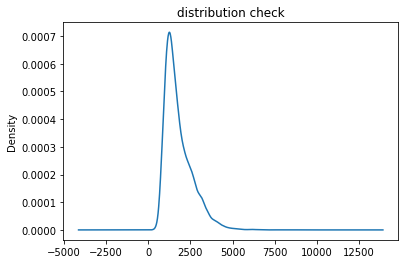

In [62]:
X['sqft_above'].plot.kde()
plt.title("distribution check")
plt.show()

#### Checking for Homoscedasticity:
- If our previous assumption of distribution normality was met we could run a QB test, but that is not an option here. But the early function gave us the plot that showed predictors vs residuals, and that shows us that this assumption is not met. Generally there should be no clear pattern in that plot, and the cone shape that we have indicates a pattern. 

reference :https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/#:~:text=A%20scatterplot%20of%20residuals%20versus,)%2C%20the%20data%20is%20heteroscedastic.

***

### Iteration 1: Model with Additional Home Features

Below are the listed home features that we can use in our models, We will use these to attempt to find a correlation between them and higher sale prices.



In [63]:
df_clean.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       '11 Excellent', '12 Luxury', '13 Mansion', '3 Poor', '4 Low', '5 Fair',
       '6 Low Average', '7 Average', '8 Good', '9 Better', 'cond_Fair',
       'cond_Good', 'cond_Poor', 'cond_Very Good'],
      dtype='object')

- On this model we will add:
    - bedrooms
    - bathrooms
    - floors
    - yr_built
    - sqft_basement
    - waterfront
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     4285.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:45:15   Log-Likelihood:            -2.9162e+05
No. Observations:               21142   AIC:                         5.832e+05
Df Residuals:                   21134   BIC:                         5.833e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.422e+06   1.35e+05     47.535      0.000    6.16e+06    6.69e+06
sqft_above      294.6533      3.084     95.546      0.000     288.609     300.698
bedrooms      -6.641e+04   2295.891    -28.924      0.000   -7.09e+04   -6.19e+04
bathrooms      7.059e+04   3830.831     18.428      0.000    6.31e+04    7.81e+04
floors         4.919e+04   4076.469     12.067      0.000    4.12e+04    5.72e+04
sqft_basement   279.9088      4.752     58.909      0.000     270.595     289.222
waterfront     7.764e+05   2.02e+04     38.511      0.000    7.37e+05    8.16e+05
yr_built      -3295.0002     70.017    -47.060      0.000   -3432.240   -3157.761
==============================================================================
Omnibus:                    12516.577   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403843.524
Skew:                           2.300   Prob(JB):                         0.00
Kurtosis:                      23.911   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.5865332021790575
Model Mean Absolute Error: 157078.60550050123


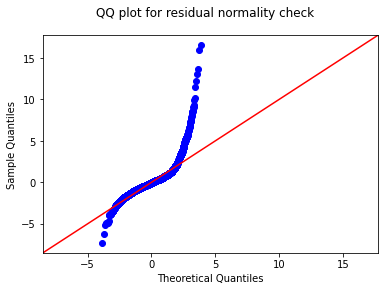

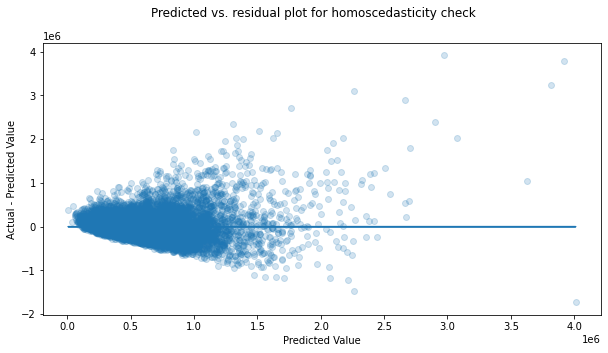

In [64]:
# Using our handy function to create our new model:

X_iteration1 = df_clean[['sqft_above', 'bedrooms', 'bathrooms', 'floors', 'sqft_basement', 'waterfront', 'yr_built']]
reg_qq_sced(y, X_iteration1)

#### Findings:

- Our R-squared is up a few points from .366 to .587, which is a vast improvement.

- Our MAE is down to  157078 from 192247.35, which again is an improvement but not where we would like it to be.

- The variables all seem to be significant according to the P-value.


#### Assumptions:
- Linearity: As shown earlier with the heatmap and following list there is a linear correlation between the home features and price.

#### Normality of Distribution:

- As with the previous model our QQ plot does not look the way we want it to when looking at the predicted vs residual data. Even though our Durbin-Watson score of 1.95 is considered good, I dont feel safe saying this model passes this assumption

#### Checking for Homoscedasticity:


Again we cant use the GQ test since the model isnt normally distributed, so just looking at the plot there still seems to be a cone pattern. Therefore this assumption is not met.

#### Fine Tuning the Model:
- I think maybe narrowing down the data a little could have a positive impact, after some research it seems that removing the top 5% from the 'price' data could remove a lot of outliers.
- Another option is to perform log transformation on some of the non-normal data and observe its impact on the data.

In [66]:
# These features will have a log function performed to help with the distribution and make our
# model more reliable.
continuous = [ 'floors', 'bedrooms', 'bathrooms', 'yr_built']
df_cont = df_clean[continuous]

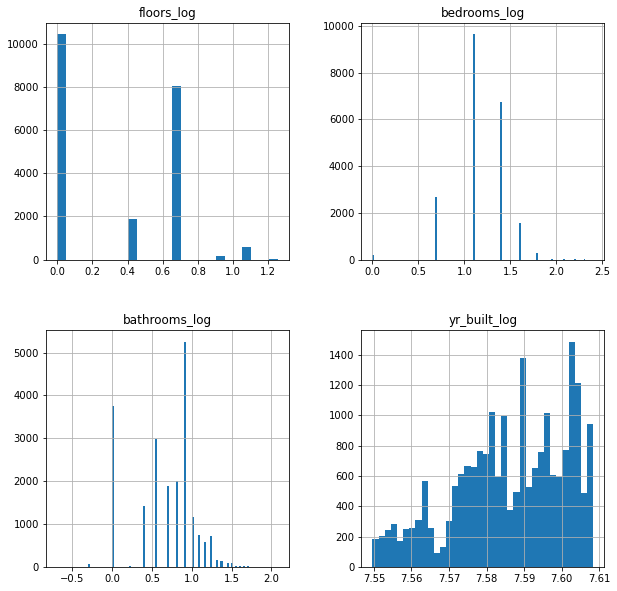

In [67]:
import numpy as np

log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names
df_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

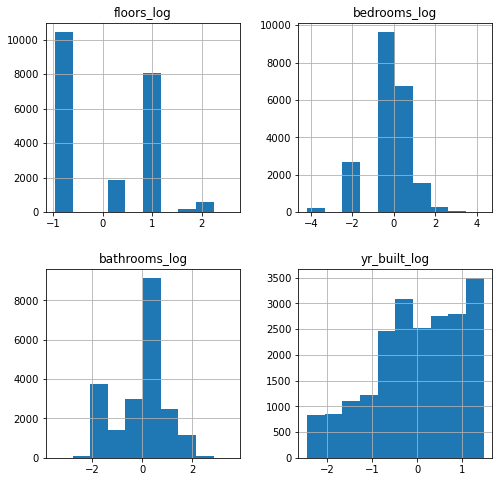

In [68]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = df_log.apply(normalize)

features_final.hist(figsize  = [8, 8]);

In [69]:
df_clean_log = pd.concat([df_clean, df_log], axis =1 )
df_clean_log

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,8 Good,9 Better,cond_Fair,cond_Good,cond_Poor,cond_Very Good,floors_log,bedrooms_log,bathrooms_log,yr_built_log
0,221900.00,3,1.00,5650,1.00,0,1180,0.00,1955,0.00,...,0,0,0,0,0,0,0.00,1.10,0.00,7.58
1,538000.00,3,2.25,7242,2.00,0,2170,400.00,1951,1991.00,...,0,0,0,0,0,0,0.69,1.10,0.81,7.58
2,180000.00,2,1.00,10000,1.00,0,770,0.00,1933,0.00,...,0,0,0,0,0,0,0.00,0.69,0.00,7.57
3,604000.00,4,3.00,5000,1.00,0,1050,910.00,1965,0.00,...,0,0,0,0,0,1,0.00,1.39,1.10,7.58
4,510000.00,3,2.00,8080,1.00,0,1680,0.00,1987,0.00,...,1,0,0,0,0,0,0.00,1.10,0.69,7.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1131,3.00,0,1530,0.00,2009,0.00,...,1,0,0,0,0,0,1.10,1.10,0.92,7.61
21593,400000.00,4,2.50,5813,2.00,0,2310,0.00,2014,0.00,...,1,0,0,0,0,0,0.69,1.39,0.92,7.61
21594,402101.00,2,0.75,1350,2.00,0,1020,0.00,2009,0.00,...,0,0,0,0,0,0,0.69,0.69,-0.29,7.61
21595,400000.00,3,2.50,2388,2.00,0,1600,0.00,2004,0.00,...,1,0,0,0,0,0,0.69,1.10,0.92,7.60


In [70]:
# Let's remove the 'price' outliers in the top 5% of the observations

df_clean_log = df_clean_log.query('price < price.quantile(.95)')
#ref:https://medium.com/@nathancook_36247/pandas-dataframe-query-method-with-f-strings-b7ba272ff188

In [71]:
# Since we created a new df we need to split into X and Y again
X = df_clean_log.drop('price', axis=1)
y = df_clean_log['price']
X.shape, y.shape

((20077, 27), (20077,))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     2459.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:49:05   Log-Likelihood:            -2.6843e+05
No. Observations:               20077   AIC:                         5.369e+05
Df Residuals:                   20069   BIC:                         5.369e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.219e+07   7.28e+05     44.216      0.000    3.08e+07    3.36e+07
sqft_above      179.4269      2.254     79.620      0.000     175.010     183.844
bedrooms_log  -1.011e+05   4979.403    -20.312      0.000   -1.11e+05   -9.14e+04
bathrooms_log   8.13e+04   4855.295     16.745      0.000    7.18e+04    9.08e+04
floors_log     8.293e+04   4304.170     19.268      0.000    7.45e+04    9.14e+04
sqft_basement   173.3692      3.421     50.673      0.000     166.663     180.075
yr_built_log  -4.222e+06   9.61e+04    -43.930      0.000   -4.41e+06   -4.03e+06
waterfront     1.615e+05   2.16e+04      7.488      0.000    1.19e+05    2.04e+05
==============================================================================
Omnibus:                      730.736   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.469
Skew:                           0.438   Prob(JB):                    8.60e-188
Kurtosis:                       3.513   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.4614668980856985
Model Mean Absolute Error: 122647.72898069881


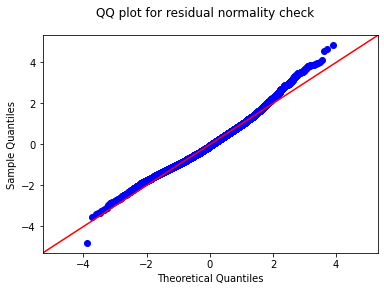

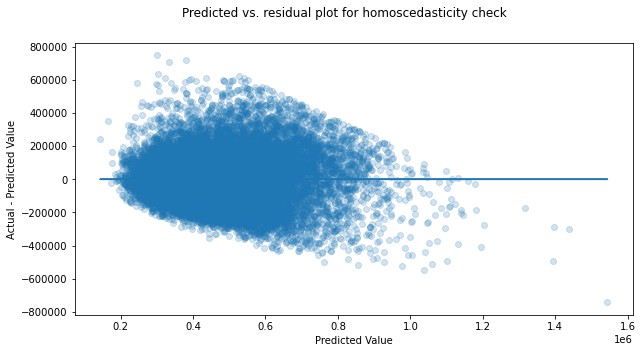

In [72]:
X_iteration1_log = df_clean_log[['sqft_above', 'bedrooms_log', 'bathrooms_log', 'floors_log', 'sqft_basement', 'yr_built_log', 'waterfront']]
reg_qq_sced(y, X_iteration1_log)

#### Findings:

-  Our R-squared value went down by over 10 points to .46, which means it can explain approximately 46% of the variation between the mean and the fitted line, or the proportion of the variance. 

- Our MAE went down again from 157078 to 122,647.

- All variables were considered significant according to the P-values.

- An issue that does seem to be improved with this iteration is the skew and kurtosis, both of which have drastically lowered and are in more acceptable ranges, skew = .43, kurtosis = 3.5.

- Another improvement is the JB score which is at 861, down from over 722000 initially.

#### Checking For Assumptions:

- Linearity is met as previously shown.

#### Normality:

- For this first time our QQ plot is showing some normality and is not deviating anywhere near as much as the other models. 
- Additionally our Durbin-Watson score of 1.969 is another inidcator that this assumption is met.

#### Homoscedasticity: 

- This is also the first time our predicted vs residual plot does not have as clear a cone shape which indicates a violation, but it also does not follow as tight as a pattern as we would like to see, therefore we will attempt to run a test to officially determine if the model is homoscedastic or heteroskedastic.

In [74]:
# GQ test if ever get normal distrib

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y, X_iteration1_log)
list(zip(name, test))

#ref:# https://github.com/statsmodels/statsmodels/blob/main/examples/python/regression_diagnostics.py


[('F statistic', 0.9431189926616219), ('p-value', 0.9983185848319197)]

The null hypothesis for the GQ test is homoscedasticity. The larger the F-statistic, the more evidence we will have against the homoscedasticity assumption and the more likely we have heteroscedasticity (different variance for the two groups).

The p-value for our tests above tells us whether or not to reject the null-hypothesis of homoscedasticity. Taking a confidence level of alpha = 0.05, we cannot reject the null hypothesis because the p-value is larger than 0.05. So even though we visually inspected some heteroscedasticity previously, this cannot be confirmed by the GQ test.

Ref: https://flatiron.illumidesk.com/user/briodonn1021/notebooks/dsc-ols-regression-diagnostics/index.ipynb

#### Iteration 2: New Set of Home Features

- We will use other variables from the data set to continue our attempt and proving our hypothesis that certain features are correlated to higher selling prices. 

- While preparing the data we had to break down the 'grade' category to be able to use that category in our models, now we will begin to add those values in. 

- On the last model the home features with the best coefficients were the square footage, floors and basement square footage( determined by the general idea that as the X-variable increases by 1, the price will increase by that coefficient).

ref: https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1409.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:53:43   Log-Likelihood:            -2.6777e+05
No. Observations:               20077   AIC:                         5.356e+05
Df Residuals:                   20062   BIC:                         5.357e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.462e+05   8873.496     61.555      0.000    5.29e+05    5.64e+05
sqft_above        74.4226      2.199     33.849      0.000      70.113      78.732
sqft_basement    119.9809      2.766     43.380      0.000     114.560     125.402
4 Low          -3.937e+05      3e+04    -13.140      0.000   -4.52e+05   -3.35e+05
5 Fair         -3.948e+05   1.23e+04    -32.046      0.000   -4.19e+05   -3.71e+05
6 Low Average  -3.604e+05   7869.497    -45.803      0.000   -3.76e+05   -3.45e+05
7 Average      -3.022e+05   6751.033    -44.766      0.000   -3.15e+05   -2.89e+05
8 Good         -2.084e+05   6339.730    -32.874      0.000   -2.21e+05   -1.96e+05
9 Better       -8.532e+04   6358.727    -13.418      0.000   -9.78e+04   -7.29e+04
11 Excellent    9.939e+04   1.33e+04      7.455      0.000    7.33e+04    1.26e+05
12 Luxury         3.8e+04   6.74e+04      0.564      0.573   -9.41e+04     1.7e+05
cond_Fair      -2.925e+04   1.19e+04     -2.458      0.014   -5.26e+04   -5927.913
cond_Good       3.315e+04   2512.596     13.194      0.000    2.82e+04    3.81e+04
cond_Poor       1.565e+04   2.91e+04      0.537      0.591   -4.15e+04    7.28e+04
cond_Very Good  9.291e+04   4144.836     22.415      0.000    8.48e+04    1.01e+05
==============================================================================
Omnibus:                     1231.255   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1585.534
Skew:                           0.582   Prob(JB):                         0.00
Kurtosis:                       3.735   Cond. No.                     1.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.4955127506159078
Model Mean Absolute Error: 117620.45506761577


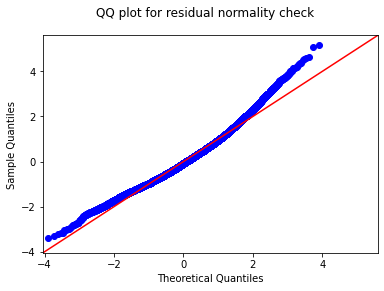

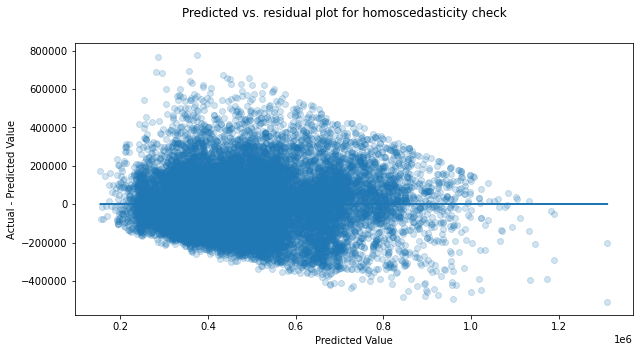

In [75]:
iteration2 = df_clean_log[['sqft_above','sqft_basement', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '11 Excellent', '12 Luxury', 'cond_Fair',
                      'cond_Good',
                      'cond_Poor',
                      'cond_Very Good',]]
reg_qq_sced(y, iteration2)

#### Findings:
- R-squared is up to .495.

- MAE is down to 117620.

- According to the P-values - Luxury and poor condition are not significant.  

- Our skew and Kurtosis are still in acceptable ranges. 


#### Assumptions:

- There is a linear relationship between the variables.

#### Normality:

- Our QQ plot still looks good especially compared to the first models.
- The DW score of 1.97 also tells us this assumption is met.

#### Homoscedasticity:
- Our earlier models had a strong cone shape indicating this assumption was not met, and while now there is less of a pattern the plot alone is not enough to go off of. 

In [76]:

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y, iteration2)
list(zip(name, test))


[('F statistic', 0.962035709899895), ('p-value', 0.9736545051482379)]

Once again this assumption is not met according to the GQ test.

#### Fine Tuning of Second Iteration:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1644.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:56:04   Log-Likelihood:            -2.6777e+05
No. Observations:               20077   AIC:                         5.356e+05
Df Residuals:                   20064   BIC:                         5.357e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.463e+05   8872.830     61.566      0.000    5.29e+05    5.64e+05
sqft_above        74.4816      2.196     33.924      0.000      70.178      78.785
sqft_basement    120.0077      2.765     43.397      0.000     114.587     125.428
4 Low          -3.932e+05   2.99e+04    -13.132      0.000   -4.52e+05   -3.35e+05
5 Fair         -3.943e+05   1.23e+04    -32.147      0.000   -4.18e+05    -3.7e+05
6 Low Average  -3.605e+05   7864.760    -45.833      0.000   -3.76e+05   -3.45e+05
7 Average      -3.023e+05   6746.340    -44.815      0.000   -3.16e+05   -2.89e+05
8 Good         -2.086e+05   6332.565    -32.937      0.000   -2.21e+05   -1.96e+05
9 Better       -8.553e+04   6347.562    -13.475      0.000    -9.8e+04   -7.31e+04
11 Excellent     9.91e+04   1.33e+04      7.440      0.000     7.3e+04    1.25e+05
cond_Fair      -2.937e+04   1.19e+04     -2.469      0.014   -5.27e+04   -6054.647
cond_Good       3.311e+04   2511.055     13.186      0.000    2.82e+04     3.8e+04
cond_Very Good  9.285e+04   4143.548     22.409      0.000    8.47e+04    1.01e+05
==============================================================================
Omnibus:                     1231.865   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1586.315
Skew:                           0.582   Prob(JB):                         0.00
Kurtosis:                       3.735   Cond. No.                     5.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.4955477819158183
Model Mean Absolute Error: 117624.11037376309


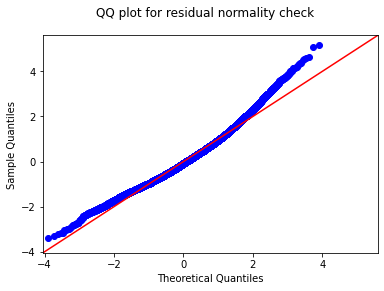

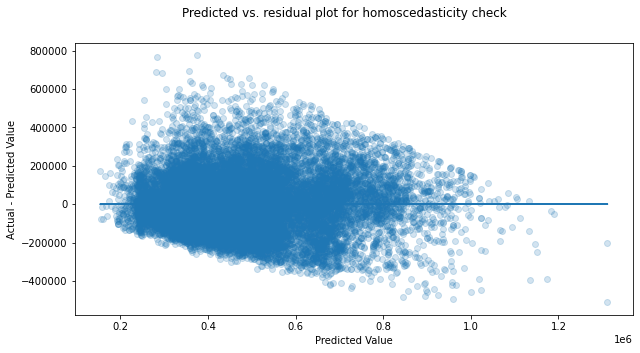

In [77]:
# Removing '12 Luxury' and'poor' from model:
iteration2a = df_clean_log[['sqft_above', 'sqft_basement', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '11 Excellent', 'cond_Fair',
                      'cond_Good','cond_Very Good',]]
reg_qq_sced(y, iteration2a)

Removing the non-significant features did not have any noticeable impact.

#### New Model:

Now after taking a look at a few baseline models I would like to consider using home features that we know are most dominant in terms of controlling asking prices for home sales.

The idea is to work our way to a model that answers our business problem of what home features are most correlated to the highest selling prices.

- Features that will be used in this model:
    - sqft_above
    - sqft_basement
    - grade_11_Excellent
    - Floors
    - Bathrooms
    - cond_good
    - cond_very good
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     2020.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:56:23   Log-Likelihood:            -2.6929e+05
No. Observations:               20077   AIC:                         5.386e+05
Df Residuals:                   20069   BIC:                         5.387e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.35e+05   3424.578     39.418      0.000    1.28e+05    1.42e+05
sqft_above       156.0893      2.261     69.023      0.000     151.657     160.522
sqft_basement    181.4021      3.403     53.308      0.000     174.732     188.072
11 Excellent    1.558e+05   1.36e+04     11.483      0.000    1.29e+05    1.82e+05
floors_log      7.639e+04   4520.436     16.899      0.000    6.75e+04    8.52e+04
bathrooms_log  -1.729e+04   4548.048     -3.802      0.000   -2.62e+04   -8379.368
cond_Good       2.705e+04   2756.012      9.816      0.000    2.17e+04    3.25e+04
cond_Very Good  7.801e+04   4464.147     17.475      0.000    6.93e+04    8.68e+04
==============================================================================
Omnibus:                      962.539   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1113.147
Skew:                           0.549   Prob(JB):                    1.92e-242
Kurtosis:                       3.354   Cond. No.                     2.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.41317509460658786
Model Mean Absolute Error: 129641.9910718992


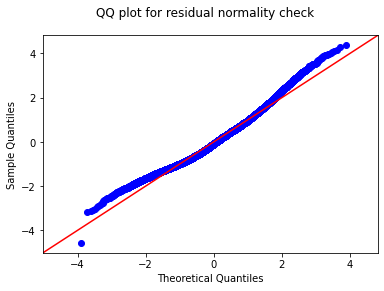

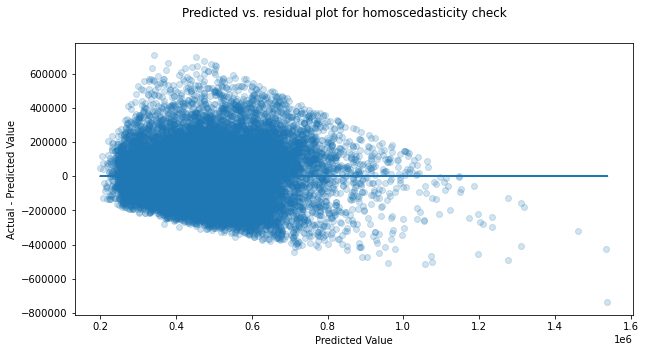

In [78]:
model_2 = df_clean_log[['sqft_above', 'sqft_basement', '11 Excellent', 'floors_log', 'bathrooms_log',
                      'cond_Good', 'cond_Very Good',]]
reg_qq_sced(y, model_2)



### New Model Findings:

We see from the R-squared and MAE this model did not make any improvements. 

We will work on this model adding features and dropping them based on data such as the P-value being significant or the coefficients.




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     1831.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:56:46   Log-Likelihood:            -2.6914e+05
No. Observations:               20077   AIC:                         5.383e+05
Df Residuals:                   20068   BIC:                         5.384e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.992e+05   5044.936     39.484      0.000    1.89e+05    2.09e+05
sqft_above       171.1685      2.410     71.037      0.000     166.445     175.891
sqft_basement    196.5688      3.491     56.307      0.000     189.726     203.411
bedrooms_log   -8.905e+04   5170.251    -17.224      0.000   -9.92e+04   -7.89e+04
bathrooms_log  -1389.4698   4608.364     -0.302      0.763   -1.04e+04    7643.303
floors_log      7.121e+04   4497.559     15.833      0.000    6.24e+04       8e+04
11 Excellent    1.393e+05   1.35e+04     10.312      0.000    1.13e+05    1.66e+05
cond_Good       3.046e+04   2743.056     11.103      0.000    2.51e+04    3.58e+04
cond_Very Good   8.19e+04   4437.362     18.456      0.000    7.32e+04    9.06e+04
==============================================================================
Omnibus:                     1035.549   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1222.008
Skew:                           0.562   Prob(JB):                    4.41e-266
Kurtosis:                       3.446   Cond. No.                     2.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.4216953444725393
Model Mean Absolute Error: 128195.29350949096


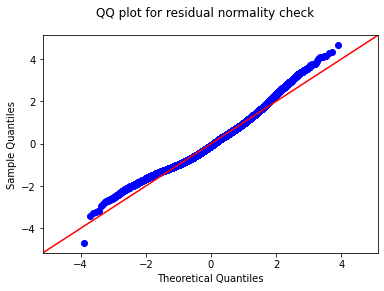

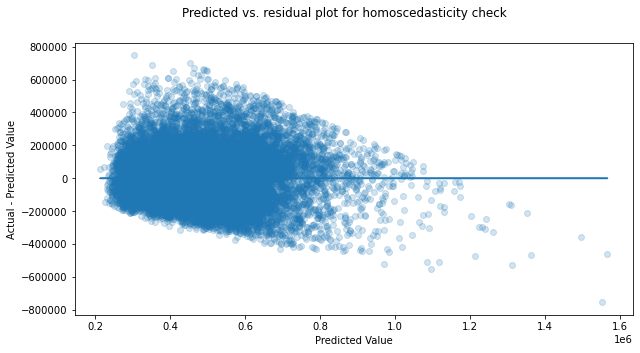

In [79]:
# Iterating the second model while including bedrooms
model2a = df_clean_log[['sqft_above', 'sqft_basement', 'bedrooms_log', 'bathrooms_log', 'floors_log', '11 Excellent',
                      'cond_Good', 'cond_Very Good',]]
reg_qq_sced(y, model2a)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     2093.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:57:09   Log-Likelihood:            -2.6914e+05
No. Observations:               20077   AIC:                         5.383e+05
Df Residuals:                   20069   BIC:                         5.384e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.994e+05   4990.455     39.959      0.000     1.9e+05    2.09e+05
sqft_above       170.8812      2.213     77.209      0.000     166.543     175.219
sqft_basement    196.1146      3.149     62.275      0.000     189.942     202.287
bedrooms_log   -8.937e+04   5065.288    -17.643      0.000   -9.93e+04   -7.94e+04
floors_log      7.069e+04   4156.927     17.006      0.000    6.25e+04    7.88e+04
11 Excellent    1.394e+05   1.35e+04     10.332      0.000    1.13e+05    1.66e+05
cond_Good       3.051e+04   2736.539     11.151      0.000    2.52e+04    3.59e+04
cond_Very Good  8.191e+04   4437.100     18.460      0.000    7.32e+04    9.06e+04
==============================================================================
Omnibus:                     1036.594   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1223.294
Skew:                           0.562   Prob(JB):                    2.32e-266
Kurtosis:                       3.446   Cond. No.                     2.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.42172154068737144
Model Mean Absolute Error: 128195.93390246789


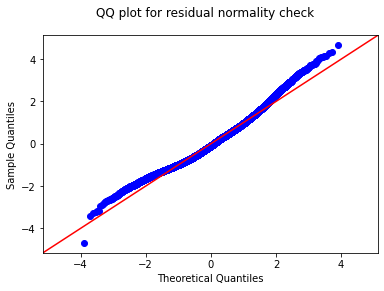

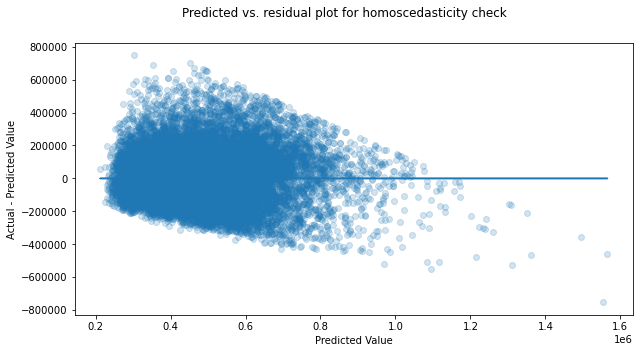

In [80]:
# removing non-sign bathrooms.

iteration3a = df_clean_log[['sqft_above', 'sqft_basement', 'bedrooms_log', 'floors_log', '11 Excellent',
                      'cond_Good', 'cond_Very Good',]]
reg_qq_sced(y, iteration3a)

#### Final Model
The past few models seem to be treading water. We started with the highest correlated feature and built off of there in an attempt to see what yields the best results. After performing our cleaning and log functions of the data this final model will include the majority of the features. The lower ends of the grade and condition values will not be included.

In [81]:
# All Features
df_clean_log.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       '11 Excellent', '12 Luxury', '13 Mansion', '3 Poor', '4 Low', '5 Fair',
       '6 Low Average', '7 Average', '8 Good', '9 Better', 'cond_Fair',
       'cond_Good', 'cond_Poor', 'cond_Very Good', 'floors_log',
       'bedrooms_log', 'bathrooms_log', 'yr_built_log'],
      dtype='object')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1536.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:23:29   Log-Likelihood:            -2.6697e+05
No. Observations:               20077   AIC:                         5.340e+05
Df Residuals:                   20061   BIC:                         5.341e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            3.63e+07    7.2e+05     50.415      0.000    3.49e+07    3.77e+07
waterfront      1.559e+05   2.01e+04      7.775      0.000    1.17e+05    1.95e+05
sqft_above       116.0292      2.514     46.146      0.000     111.101     120.958
sqft_basement    131.8425      3.272     40.296      0.000     125.429     138.256
11 Excellent     1.59e+05   1.27e+04     12.527      0.000    1.34e+05    1.84e+05
13 Mansion      9.966e-10   1.04e-10      9.539      0.000    7.92e-10     1.2e-09
6 Low Average  -2.319e+05   6352.654    -36.507      0.000   -2.44e+05   -2.19e+05
7 Average      -1.582e+05   5333.549    -29.670      0.000   -1.69e+05   -1.48e+05
8 Good         -7.369e+04   5165.105    -14.266      0.000   -8.38e+04   -6.36e+04
9 Better         3.17e+04   5465.876      5.800      0.000     2.1e+04    4.24e+04
cond_Fair      -8.024e+04   1.14e+04     -7.025      0.000   -1.03e+05   -5.78e+04
cond_Good       8148.3012   2523.741      3.229      0.001    3201.560    1.31e+04
cond_Very Good  3.777e+04   4132.706      9.140      0.000    2.97e+04    4.59e+04
floors_log      6.316e+04   4102.413     15.395      0.000    5.51e+04    7.12e+04
bedrooms_log   -6.039e+04   4776.892    -12.642      0.000   -6.98e+04    -5.1e+04
bathrooms_log   5.794e+04   4645.123     12.472      0.000    4.88e+04     6.7e+04
yr_built_log   -4.738e+06    9.5e+04    -49.883      0.000   -4.92e+06   -4.55e+06
==============================================================================
Omnibus:                      596.103   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              892.426
Skew:                           0.303   Prob(JB):                    1.63e-194
Kurtosis:                       3.836   Cond. No.                     1.26e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.49e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model adjusted R-squared: 0.5341823646458952
Model Mean Absolute Error: 111818.9870783669


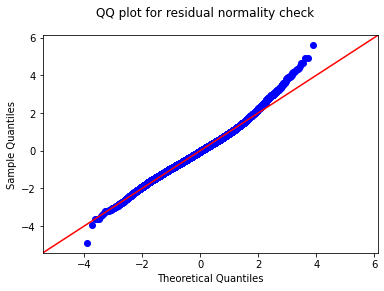

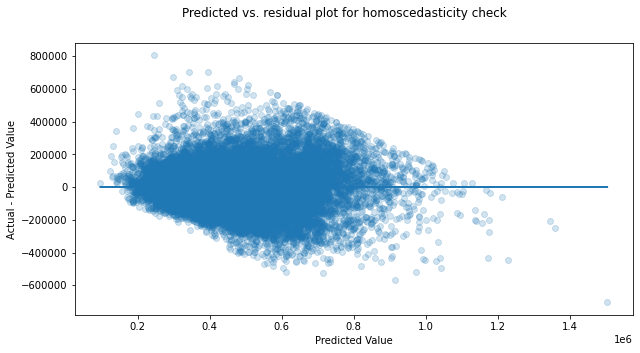

In [90]:

iteration_all = df_clean_log[[  
                               'waterfront',
                               'sqft_above',
                               'sqft_basement',
                               '11 Excellent', 
                               '13 Mansion',
                               '6 Low Average',
                               '7 Average', 
                               '8 Good', 
                               '9 Better',
                               'cond_Fair',
                               'cond_Good',
                               'cond_Very Good',
                               'floors_log',
                               'bedrooms_log', 
                               'bathrooms_log',
                                'yr_built_log',
                                
                               
                               ]]
reg_qq_sced(y, iteration_all)

In [83]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y, iteration_all)
list(zip(name, test))


[('F statistic', 0.9459442168817292), ('p-value', 0.9972953912631873)]

#### Final Model Findings

   - Our R-sqaured is looking better then ever at .535
   - Our MAE is also the best its looked 111,818
   - All of our variables look to be significant
   - Our Skew and Kurtosis are still in good ranges
   - The JB score is down immensely from our first models
   - Our assumptions seem to be as good as they are going to get:
       - linearity is met
       - Normality looks good on the QQ plot and with the DW score of 1.96
       - Homoscedasticity still has not been met according to the scatter plot


***

#### Understanding the caveats and limitations of the model
The final model which included nearly all features other than 'cond_poor', as well as '5 fair' and lower for 'grade', produced our best all around results.

- While the R-squared of .535 is not quite as high as we would like it, it still has value in explaining approximately 54% of the variance of our target variable, price.
- Our Mean of Absolute Errors, which tell us how much of an error we can predict on average is down immensely to 111,818.
- Our prob(F-statistic) of 0.00 should mean that there is a low probability of achieving these results with the null hypothesis being true, and tells us that our regression is meaningful.
- Our P-values were deemed significant on all features of the final model.
- With all these considerations we can reject the null hypothesis that there is no relationship between the features and the target variable, which is price, at an alpha of 0.05 and confidence level of 95%.
***
## Recommendations
In following the logic of as a X-variable(house features) increases by 1, Y(house price) will increase by coefficient, we see that according to our final model when holding all other variables constant:
  
  - Every square foot of living space added above the basement increases the sale price by    over 161 dollars ($131 for each increase in basement square footage)
   
   
   - Increasing the condition of a home from 'fair' to 'good' can increase the price by $88,388.
   
       -  According to the KC glossary 'fair' is badly worn, while 'good' means no obvious maintenance is needed.
       
       
   
   - Increasing the building grade from 'good' to 'better' can net an increase of $105,660.
       -  According to the KC glossary 'good' is a home just above average while 'better' has architectural design with extra interior and exterior design. 
    
   
   - Adding an extra floor increases the price of a house by $63,160.
   
   
   - The addition of an extra full bathroom can increase the sale price by $57,940.
   ****

#### Proposal 1
- Referring to our earlier visual we see 1-floor houses were most common, with the mean essentially being 1.5 floors. This opens a big door for our development company which has the capital to renovate these single storied homes into multi-floored while adding an extra bathroom and square footage.

#### Proposal 2
- Once again having the means to renovate a house and upgrading its building grade to 'Better' can be very profitable. We aw earlier in this notebook that the top 2 value counts in this category were 'Average' and 'Good', which shows there is ample inventory of homes that can be upgraded to the grade of 'Better'.

#### Proposal 3
- In addition to flipping houses our clients can benefit from new build homes as well. If we look at the data we see the average house has the following averages, standard deviations also denoted in parentheses:
    - Above square footage of 1,789. (828)
    - Basement square footage of 291. (442)
    - Floors 1.49 (.54)
    - 3.37 Bedrooms (.9)
    - 2.12 Bathrooms (.77)
- Therefore a new build with the following features can optimize the development companies ROI:
    - A 2-story home with approximately 2,500 above ground living space with a full basement
    - 3 Bedrooms accompanied with 3 full Bathrooms
    - According to the KC glossary a new house is automatically considered 'good' or 'very good' condition.
    

In order for the development company to properly budget for these proposals, such as their break even point and projected ROI, they should refer to the data in this notebook. Specifically the coefficients assigned to the corresponding home feature(variable) and the data in the 'describe' table which shows information such as mean, standard deviation and min/max. For example, since the final model showed a negative coefficient assigned to the bedroom model, it does not make sense go 1 standard deviation over the mean number of bedrooms, because according to our model that would NOT increase our sale price.

****
### Next Steps

The home sale prices provided in this dataset are a few years old and getting up to date information will be critical for our company.
Additionally, something that can be greatly beneficial with future models is getting prices of local building supplies that can then be used to determine exactly how much money will need to be spent when building or flipping a house. This could possibly be done with a function known as web-scraping.

In [218]:
# The code in this cell created a report containing helpful visuals and some initial data 
# analysis that I used to help get a better understanding off the dataset.
# You can find it under the main repo titled 'report'.

import sweetviz as sv
report = sv.analyze(df_clean_log)
report.show_html("./report.html")


Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


***